In [30]:
import pandas
import numpy

df = pandas.read_csv('../data/FIRE_STARTS_PER_ZONE.csv')
df



,Unnamed: 0,FIRE_CENTRE,ZONE,IGNITION_DATE,COUNT
0,0,2.0,0.0,-620758800000,1
1,1,2.0,0.0,-620499600000,1
2,2,2.0,0.0,-619808400000,1
3,3,2.0,0.0,-619635600000,2
4,4,2.0,0.0,-619462800000,7
...,...,...,...,...,...
87909,87909,7.0,24.0,116319600000,2
87910,87910,7.0,24.0,116578800000,1
87911,87911,7.0,24.0,117010800000,1
87912,87912,7.0,24.0,117270000000,1


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df[['FIRE_CENTRE', 'ZONE', 'IGNITION_DATE']]  # Features
y=df['COUNT']  # Labels

# Create regression model
model=RandomForestRegressor(n_estimators=100)

# Split data, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print("R-squared:", score) 

ypred = model.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 



R-squared: 0.8736654721213949
MSE:  9.692194627488153
RMSE:  4.846097313744076


In [32]:
# Predict into the future!
# Count of fires in fire centre 1, zone 1 on Sat May 27 2023 04:48:19 GMT+0000
out = model.predict([[1, 1, 1685162899]])
out

array([1.1])

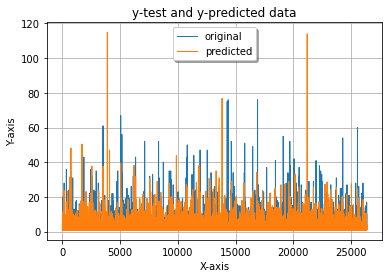

In [33]:
import matplotlib.pyplot as plt

#Plot
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 